### This script contains the following:

#### 1. Importing libraries 
#### 2. Import your data and conduct any necessary cleaning, manipulations, and reprocessing
#### 3. Make a subset of your data set if necessary. Think about the historical domain of the series to decide if you need to (if there are irrelevant historical events in your data that would bias your analysis, for example). Also, make sure your set doesn’t include any forecasted data.
#### 4. Create a line chart of your data.
#### 5. Decompose the data’s components
###### 5.1 Analyze the results from the plot in a markdown cell.
#### 6. Conduct a Dickey-Fuller test to check for stationarity.
###### 6.1 Interpret the results in a markdown cell and reference your null hypothesis.
#### 7. If your data isn’t stationary, conduct a round of differencing on it and repeat step 6.
#### 8. If your data still isn’t stationary, perform another round of differencing and repeat step 6.
#### 9. Check your data’s autocorrelations.
#### 10. Save data

#### 1. Importing libraries 

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
from datetime import datetime
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

#### 2. Import your data and conduct any necessary cleaning, manipulations, and reprocessing

In [2]:
path = r'C:\Users\eog87\Desktop\Data Analytics\2. Data Immersion\6. Advanced Analytics N Dashboard Design'

parse_dates = ['date']
df = pd.read_csv(os.path.join(path, '6. Sourcing & Analizing Time Series Data', 'gun_violence_ex5.csv'), parse_dates=parse_dates)

pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0.1,Unnamed: 0,incident_id,date,day_of_week,day,month,year,address,city_or_county,state,n_participants,n_guns_involved,n_killed,n_injured,n_adult,n_teen,n_child,n_male,n_female,n_victim,n_suspect,location_description,latitude,longitude,state_house_district,state_senate_district,congressional_district,kills_flag,injured_flag,guns_flag
0,0,0,461105,2013-01-01,Tuesday,1,1,2013,1506 Versailles Avenue and Coursin Street,Mckeesport,Pennsylvania,5,NaN,0,4,5,0,0,3,1,4,1,Unknown,40.3467,-79.8559,NaN,NaN,14.0,single kill,low injured,NaN
1,1,1,460726,2013-01-01,Tuesday,1,1,2013,13500 block of Cerise Avenue,Hawthorne,California,4,NaN,1,3,4,0,0,1,0,4,1,Unknown,33.9090,-118.3330,62.0,35.0,43.0,single kill,low injured,NaN
2,2,2,478855,2013-01-01,Tuesday,1,1,2013,1776 East 28th Street,Lorain,Ohio,5,2.0,1,3,5,0,0,5,0,3,2,Cotton Club,41.4455,-82.1377,56.0,13.0,9.0,single kill,low injured,low guns
3,3,3,478925,2013-01-05,Saturday,5,1,2013,16000 block of East Ithaca Place,Aurora,Colorado,4,NaN,4,0,4,0,0,3,1,3,1,Unknown,39.6518,-104.8020,40.0,28.0,6.0,low kills,single injured,NaN
4,4,4,478959,2013-01-07,Monday,7,1,2013,307 Mourning Dove Terrace,Greensboro,North Carolina,4,2.0,2,2,3,1,0,2,2,3,1,Unknown,36.1140,-79.9569,62.0,27.0,6.0,low kills,low injured,low guns


In [3]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   incident_id             239677 non-null  int64         
 1   date                    239677 non-null  datetime64[ns]
 2   day_of_week             239677 non-null  object        
 3   day                     239677 non-null  int64         
 4   month                   239677 non-null  int64         
 5   year                    239677 non-null  int64         
 6   address                 239677 non-null  object        
 7   city_or_county          239677 non-null  object        
 8   state                   239677 non-null  object        
 9   n_participants          239677 non-null  int64         
 10  n_guns_involved         140226 non-null  float64       
 11  n_killed                239677 non-null  int64         
 12  n_injured               239677

In [4]:
years = df.groupby(df['date'].dt.date)['date'].count()
years

date
2013-01-01      3
2013-01-05      1
2013-01-07      2
2013-01-19      1
2013-01-21      2
             ... 
2018-03-27    135
2018-03-28    175
2018-03-29    131
2018-03-30    114
2018-03-31    132
Name: date, Length: 1725, dtype: int64

In [5]:
df_dates = pd.DataFrame({'date': years.index, 'incident_count': years.values})
df_dates

,date,incident_count
0,2013-01-01,3
1,2013-01-05,1
2,2013-01-07,2
3,2013-01-19,1
4,2013-01-21,2
...,...,...
1720,2018-03-27,135
1721,2018-03-28,175
1722,2018-03-29,131
1723,2018-03-30,114


In [6]:
df_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            1725 non-null   object
 1   incident_count  1725 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 27.1+ KB


In [7]:
# Set the "Date" column as the index

from datetime import datetime

df_dates['datetime'] = pd.to_datetime(df_dates['date']) # Create a datetime column from "Date.""
df_dates = df_dates.set_index('datetime') # Set the datetime as the index of the dataframe.
df_dates.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
df_dates.head(10)

,incident_count
datetime,
2013-01-01,3
2013-01-05,1
2013-01-07,2
2013-01-19,1
2013-01-21,2
2013-01-23,2
2013-01-25,1
2013-01-26,3
2013-02-02,1


In [8]:
#Some dates are missing from the dataset and that creates issues for the seasonal decompose, filling missing dates with 0 incidents

# Create a new DataFrame with the desired date range
start_date = df_dates.index.min()
end_date = df_dates.index.max()
date_range = pd.date_range(start=start_date, end=end_date, freq='D')  # Daily frequency
df_missing_dates = pd.DataFrame(index=date_range)

# Merge the new DataFrame with the original DataFrame
df_time_series = pd.merge(df_missing_dates, df_dates, left_index=True, right_index=True, how='left')

# Fill missing values
df_time_series = df_time_series.fillna(0)
df_time_series

,incident_count
2013-01-01,3.0
2013-01-02,0.0
2013-01-03,0.0
2013-01-04,0.0
2013-01-05,1.0
...,...
2018-03-27,135.0
2018-03-28,175.0
2018-03-29,131.0
2018-03-30,114.0


#### 4. Create a line chart of your data.

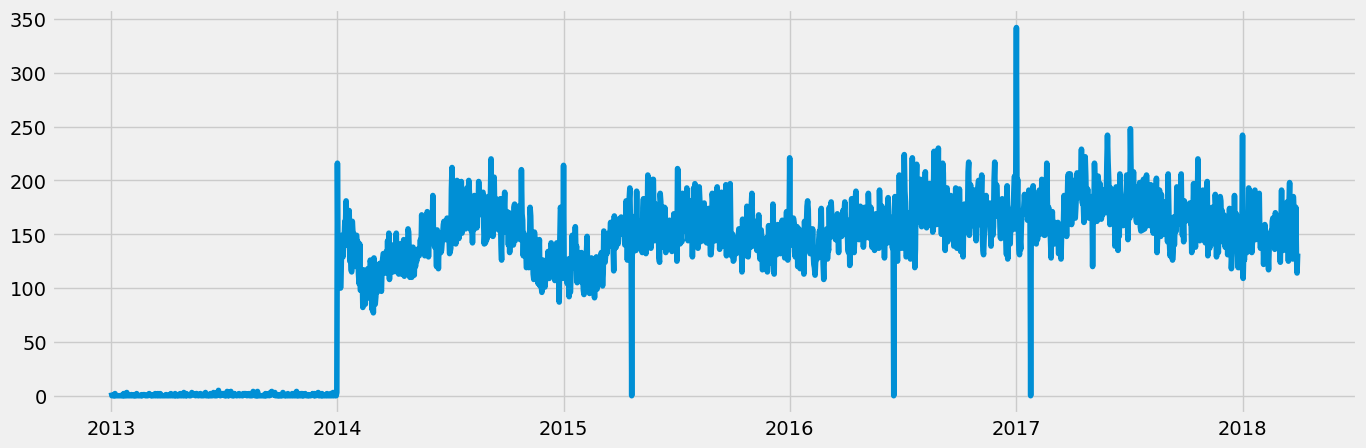

In [9]:
time_series = plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_time_series)

In [10]:
path2 = r'C:\Users\eog87\Desktop\Data Analytics\2. Data Immersion\6. Advanced Analytics N Dashboard Design\7. Creating Data Dashboards\Github'
time_series.figure.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'time_series.png'))

#### 5. Decompose the data’s components

In [11]:
# Decompose time series using additive model
decomposition = sm.tsa.seasonal_decompose(df_time_series, model='additive')

In [12]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

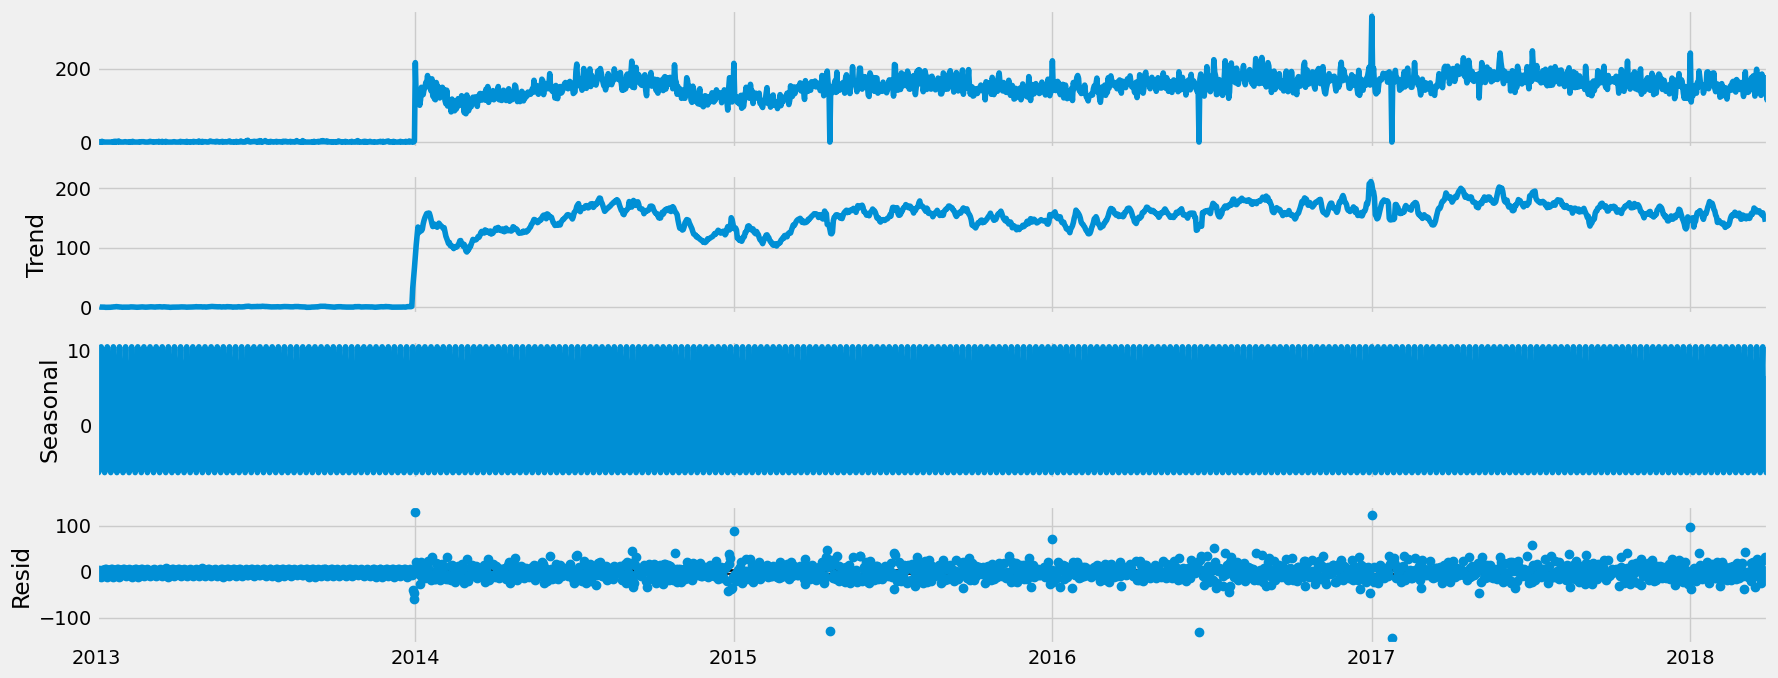

In [13]:
# Plot the separate components

decomp_time_series = decomposition.plot()
plt.show()

In [14]:
decomp_time_series.figure.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'decomp_time_series.png'))

###### 5.1 Analyze the results from the plot in a markdown cell.

#### 6. Conduct a Dickey-Fuller test to check for stationarity.

In [15]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_time_series['incident_count'])

Dickey-Fuller Stationarity test:
Test Statistic                   -2.157588
p-value                           0.221997
Number of Lags Used              26.000000
Number of Observations Used    1889.000000
Critical Value (1%)              -3.433816
Critical Value (5%)              -2.863071
Critical Value (10%)             -2.567585
dtype: float64


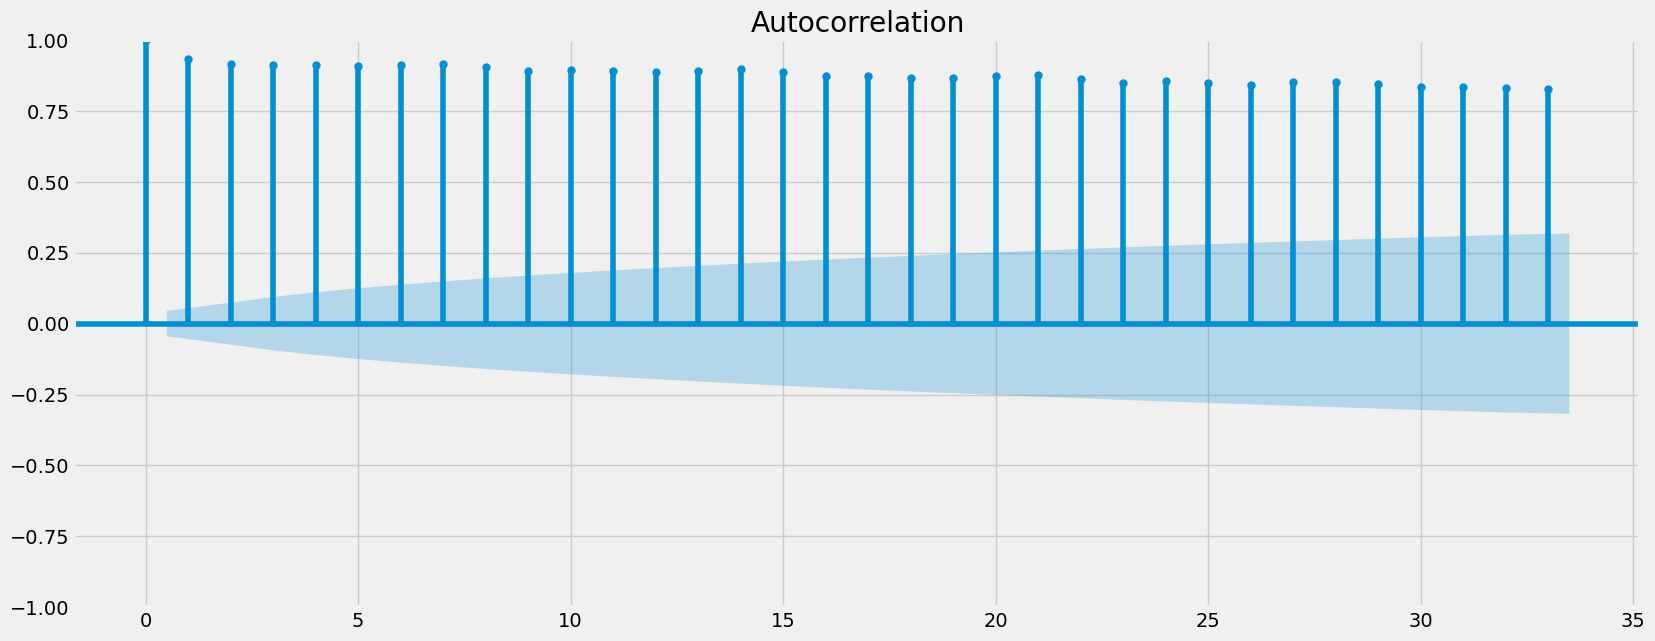

In [16]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

autocorrelation = plot_acf(df_time_series)
plt.show()

In [ ]:
autocorrelation.figure.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'time_series.png'))

###### 6.1 Interpret the results in a markdown cell and reference your null hypothesis.

Test statistic is larger than the 5% critical value, and p-value is over 0.05. I can't reject null hypothesis with these values

#### 7. If your data isn’t stationary, conduct a round of differencing on it and repeat step 6.

In [72]:
data_diff = df_time_series - df_time_series.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [73]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [74]:
data_diff.head()

,incident_count
2013-01-02,-3.0
2013-01-03,0.0
2013-01-04,0.0
2013-01-05,1.0
2013-01-06,-1.0


In [75]:
data_diff.columns

Index(['incident_count'], dtype='object')

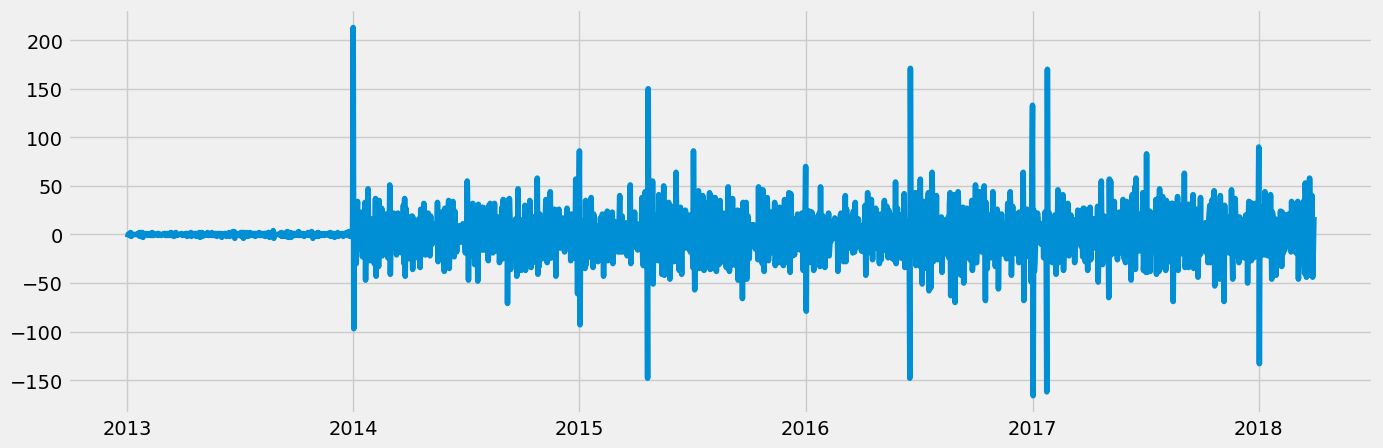

In [76]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [77]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.015733e+01
p-value                        7.668375e-18
Number of Lags Used            2.600000e+01
Number of Observations Used    1.888000e+03
Critical Value (1%)           -3.433818e+00
Critical Value (5%)           -2.863072e+00
Critical Value (10%)          -2.567586e+00
dtype: float64


#### 9. Check your data’s autocorrelations.

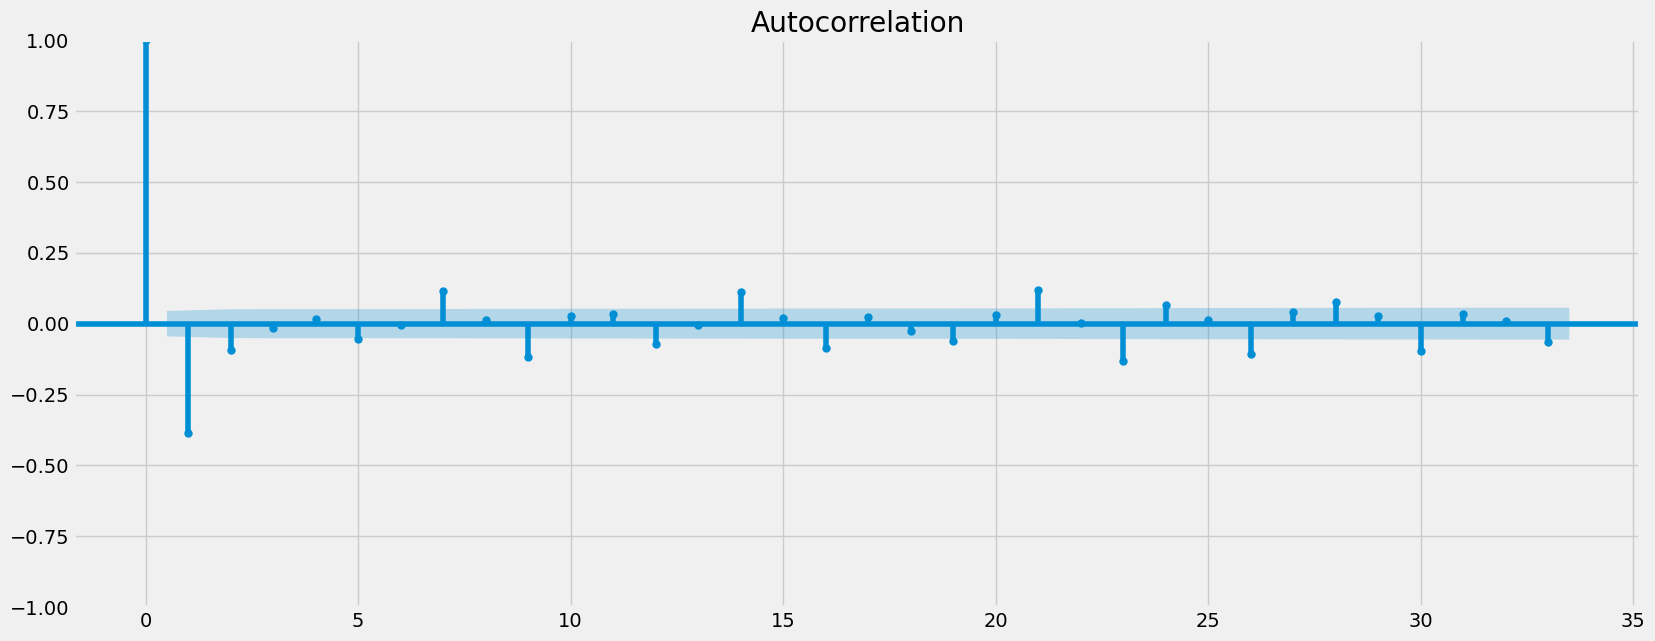

In [78]:
plot_acf(data_diff)
plt.show()

#### 10. Save data

In [86]:
# Export the dataframes to csv file
df.to_csv(os.path.join(path, '6. Sourcing & Analizing Time Series Data','gun_violence_ex6.csv'))
data_diff.to_csv(os.path.join(path,'6. Sourcing & Analizing Time Series Data','gun_violence_ex6_dates.csv'))